# Car Price Predict

| Variable      | Description                                            |
|---------------|--------------------------------------------------------|
| make          | machine firm                                           |
| model         | machine model                                          |
| price USD     | price in USD (target variable)                         |
| year          | year of production                                     |
| condition     | represents the condition at the sale moment            |
| mileage       | mileage in kilometers                                  |
| fuel type     | type of the fuel (electro, petrol, diesel)             |
| volume(cm3)   | volume of the engine in cubic centimeters              |
| color         | color of the car                                       |
| transmission  | type of transmission                                   |
| drive unit    | drive unit                                             |
| segment       | segment of the car                                     |

In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


# Data Preprocessing Part 1

In [3]:
#Checking the shape of the best dataset
df.shape

(56244, 12)

In [4]:
#Checking the data types of the columns
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [5]:
#Dividing the dataframe into training and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
df_train.shape

(44995, 12)

In [7]:
df_test.shape

(11249, 12)

In [8]:
#Droping the columns that are not needed for the analysis
df_train.drop(columns = ['model', 'segment'], inplace = True)
df_train.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
33667,nissan,2100,1998,with mileage,380000.0,petrol,2000.0,silver,auto,front-wheel drive
25694,subaru,8500,2012,with mileage,67898.0,petrol,2000.0,blue,auto,all-wheel drive
13845,honda,11500,2010,with mileage,155000.0,petrol,2400.0,black,auto,front-wheel drive
19690,kia,9697,2013,with mileage,116300.0,petrol,1600.0,other,mechanics,front-wheel drive
39907,volkswagen,3300,1997,with mileage,310000.0,diesel,1900.0,blue,mechanics,front-wheel drive


In [9]:
#Unique values in the columns
df_train.nunique()

make                     94
priceUSD               2645
year                     74
condition                 3
mileage(kilometers)    7048
fuel_type                 3
volume(cm3)             421
color                    13
transmission              2
drive_unit                4
dtype: int64

In [10]:
#Unqiue car make
df_train['make'].unique()

array(['nissan', 'subaru', 'honda', 'kia', 'volkswagen', 'ford',
       'renault', 'mitsubishi', 'audi', 'peugeot', 'opel',
       'mercedes-benz', 'skoda', 'bmw', 'mazda', 'lexus', 'suzuki',
       'citroen', 'lada-vaz', 'daewoo', 'moskvich', 'jeep', 'proton',
       'acura', 'toyota', 'raf', 'dacia', 'hyundai', 'chevrolet',
       'chrysler', 'gaz', 'alfa-romeo', 'volvo', 'saturn', 'ssangyong',
       'fiat', 'land-rover', 'gmc', 'chery', 'seat', 'rover', 'lifan',
       'daihatsu', 'uaz', 'saab', 'infiniti', 'mercury', 'zaz', 'jaguar',
       'lancia', 'geely', 'buick', 'cadillac', 'byd', 'porsche',
       'great-wall', 'mini', 'tesla', 'luaz', 'wartburg', 'izh', 'smart',
       'eksklyuziv', 'ravon', 'bentley', 'brilliance', 'aro', 'changan',
       'iran-khodro', 'vortex', 'isuzu', 'plymouth', 'scion', 'datsun',
       'tagaz', 'asia', 'lincoln', 'pontiac', 'hafei', 'maserati', 'mg',
       'haval', 'trabant', 'dong-feng', 'tata', 'roewe', 'oldsmobile',
       'saipa', 'jac', 'ast

In [11]:
#Categorizing the car make
def car_make(make):
    if make in  ['mercedes-benz', 'bmw', 'audi', 'porsche', 'jaguar', 'bentley', 'maserati', 'aston-martin', 'mclaren']:
        return 'Luxury European'
    elif make in ['volkswagen', 'renault', 'peugeot', 'opel', 'fiat', 'citroen', 'skoda']:
        return 'Mainstream'
    elif make in  ['ford', 'jeep', 'chevrolet', 'chrysler', 'gmc', 'cadillac', 'buick', 'tesla', 'lincoln', 'pontiac', 'saturn', 'dodge', 'plymouth', 'scion', 'oldsmobile']:
        return 'American'
    elif make in ['nissan', 'subaru', 'mitsubishi', 'honda', 'kia', 'mazda', 'lexus', 'suzuki', 'daewoo', 'hyundai', 'toyota', 'chery', 'lifan', 'ssangyong', 'great-wall', 'geely', 'byd', 'proton', 'isuzu', 'haval', 'dong-feng', 'jac', 'faw', 'zotye', 'hafei', 'saipa', 'roewe', 'tata']:
        return 'Asian'
    elif make in ['lada-vaz', 'moskvich', 'gaz', 'uaz', 'zaz', 'raf', 'wartburg', 'izh', 'luaz', 'fso', 'trabant']:
        return 'Russian/Eastern Europe'
    else:
        return 'Other/Special'
    
df_train['make_segment'] = df_train['make'].apply(car_make)
df_train.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
33667,nissan,2100,1998,with mileage,380000.0,petrol,2000.0,silver,auto,front-wheel drive,Asian
25694,subaru,8500,2012,with mileage,67898.0,petrol,2000.0,blue,auto,all-wheel drive,Asian
13845,honda,11500,2010,with mileage,155000.0,petrol,2400.0,black,auto,front-wheel drive,Asian
19690,kia,9697,2013,with mileage,116300.0,petrol,1600.0,other,mechanics,front-wheel drive,Asian
39907,volkswagen,3300,1997,with mileage,310000.0,diesel,1900.0,blue,mechanics,front-wheel drive,Mainstream


In [12]:
df_train.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,44995.000000,44995.000000,4.499500e+04,44960.000000
mean,7423.429425,2003.477542,2.446052e+05,2101.733407
std,8370.944815,8.131337,3.262052e+05,923.378962
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,9900.000000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


# Data Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'Mainstream'),
  Text(2, 0, 'American'),
  Text(3, 0, 'Luxury European'),
  Text(4, 0, 'Russian/Eastern Europe'),
  Text(5, 0, 'Other/Special')])

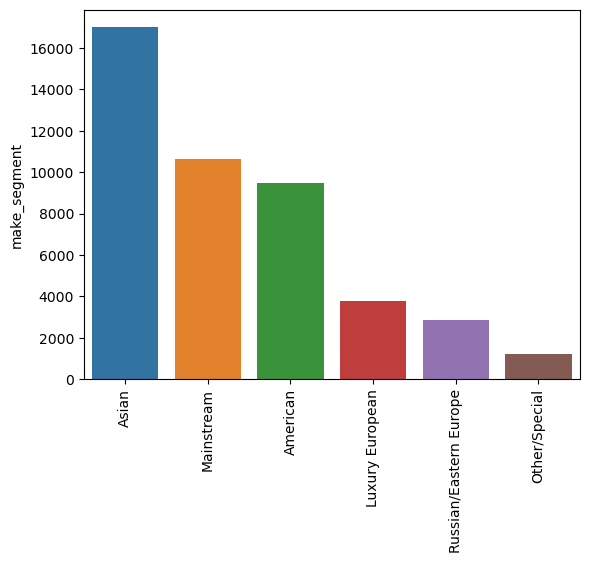

In [13]:
#car make segment
sns.barplot(x=df_train['make_segment'].unique(), y=df_train['make_segment'].value_counts())
plt.xticks(rotation = 90)

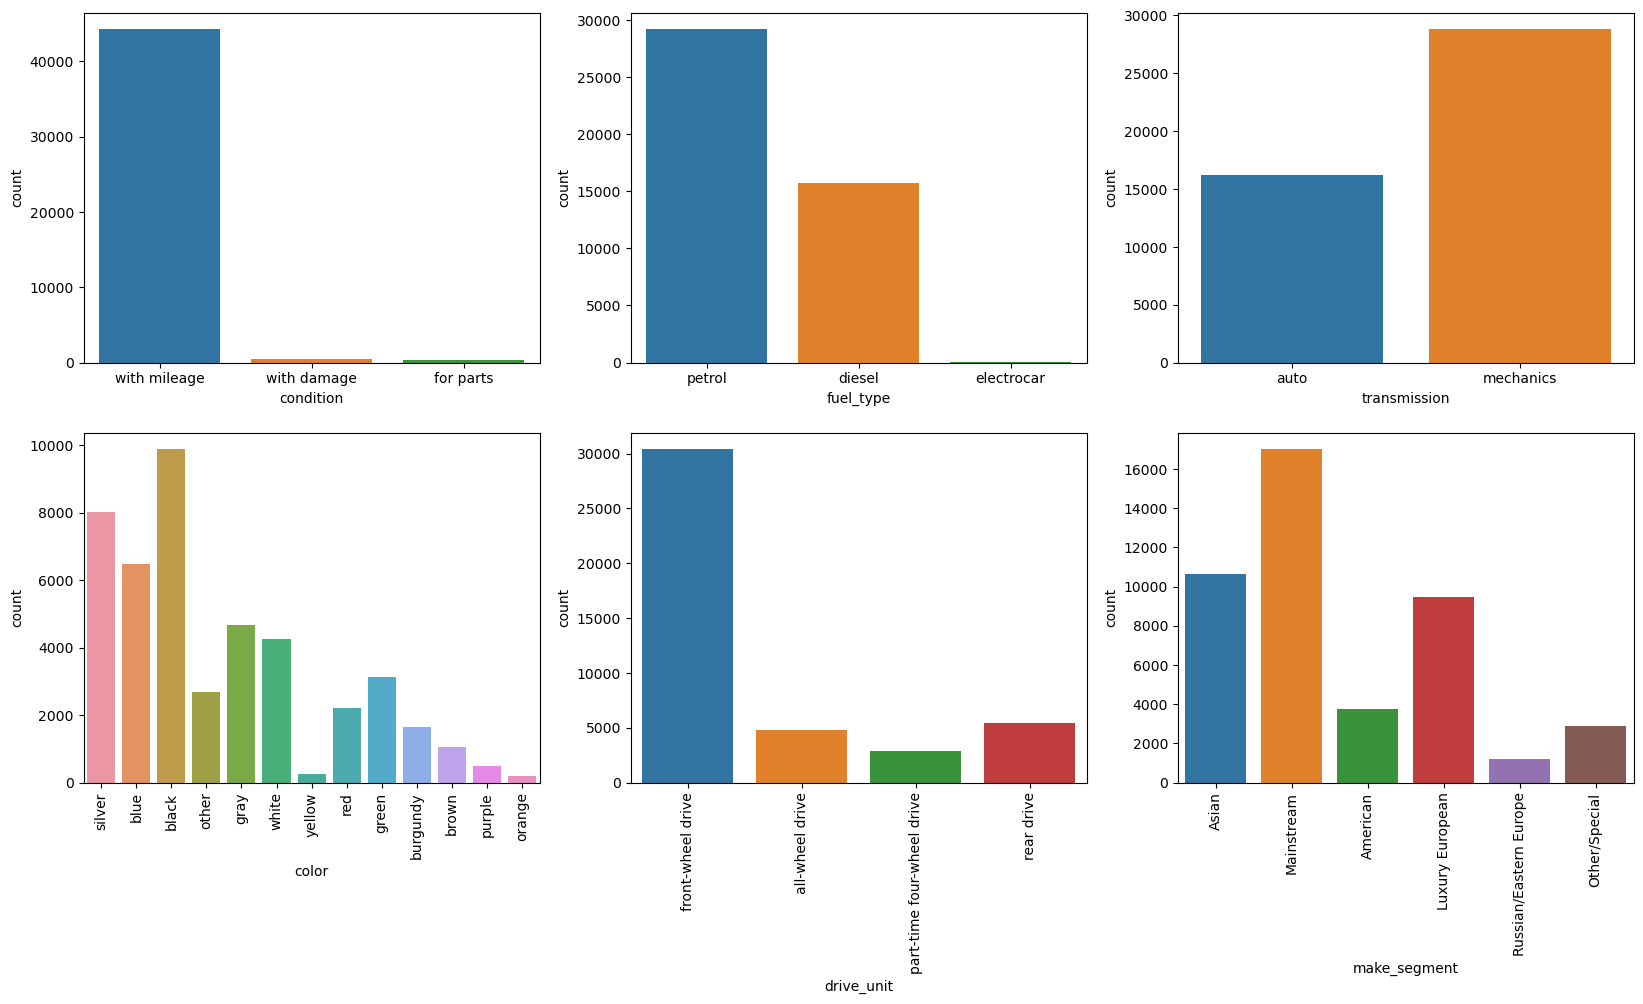

In [14]:
#Categorical Variable Distribution
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df_train, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df_train, ax=ax[0,1])
sns.countplot(x='transmission', data=df_train, ax=ax[0,2])
sns.countplot(x='color', data=df_train, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df_train, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df_train, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

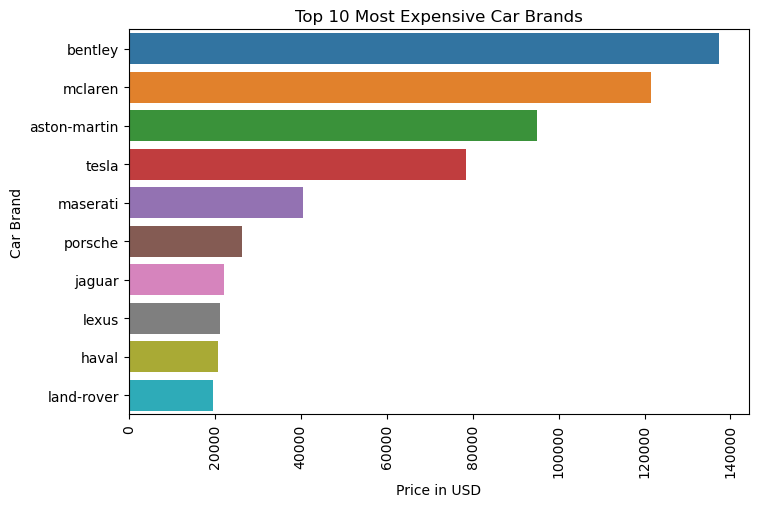

In [15]:
#Price and make
demodf = df_train.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

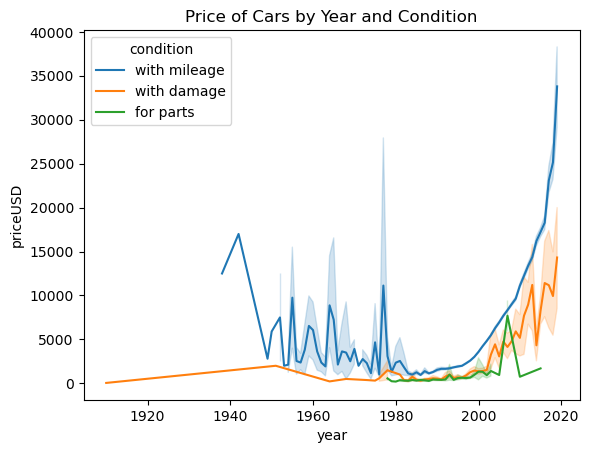

In [16]:
#Price and Condition
sns.lineplot(x='year', y='priceUSD', data = df_train, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

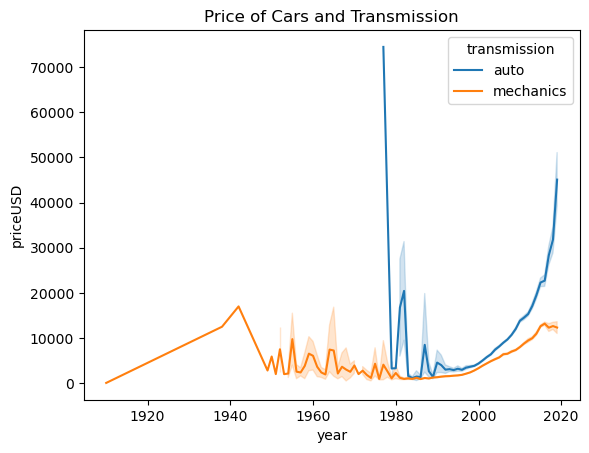

In [17]:
#price and transmission
sns.lineplot(x='year', y='priceUSD', data=df_train, hue='transmission')
plt.title('Price of Cars and Transmission')
plt.show()

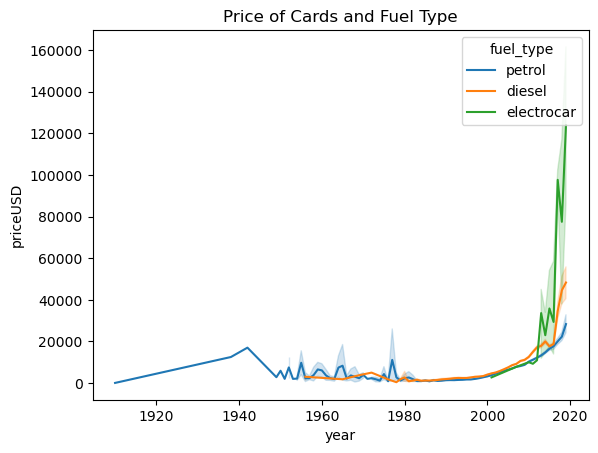

In [18]:
#Price and Fuel Type
sns.lineplot(x='year', y='priceUSD', data=df_train, hue = 'fuel_type')
plt.title('Price of Cards and Fuel Type')
plt.show()

# Data Preprocessing Part 2

In [19]:
#checking for null values
df_train.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              35
color                     0
transmission              0
drive_unit             1518
make_segment              0
dtype: int64

In [20]:
# delete them
df_train.dropna(inplace=True)

In [21]:
df_train.drop(columns=['make'], inplace=True)

In [22]:
#Label encoding for object data type
from sklearn.preprocessing import LabelEncoder

#columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']
#label encoding object
le = LabelEncoder()

#Label encoding for each column
for col in cols:
    le.fit(df_train[col])
    df_train[col] = le.transform(df_train[col])
    print(col, df_train[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [0 1]
color [10  1  0  7  4 11 12  9  5  3  2  8  6]
drive_unit [1 0 2 3]
make_segment [1 3 0 2 5 4]


<Axes: >

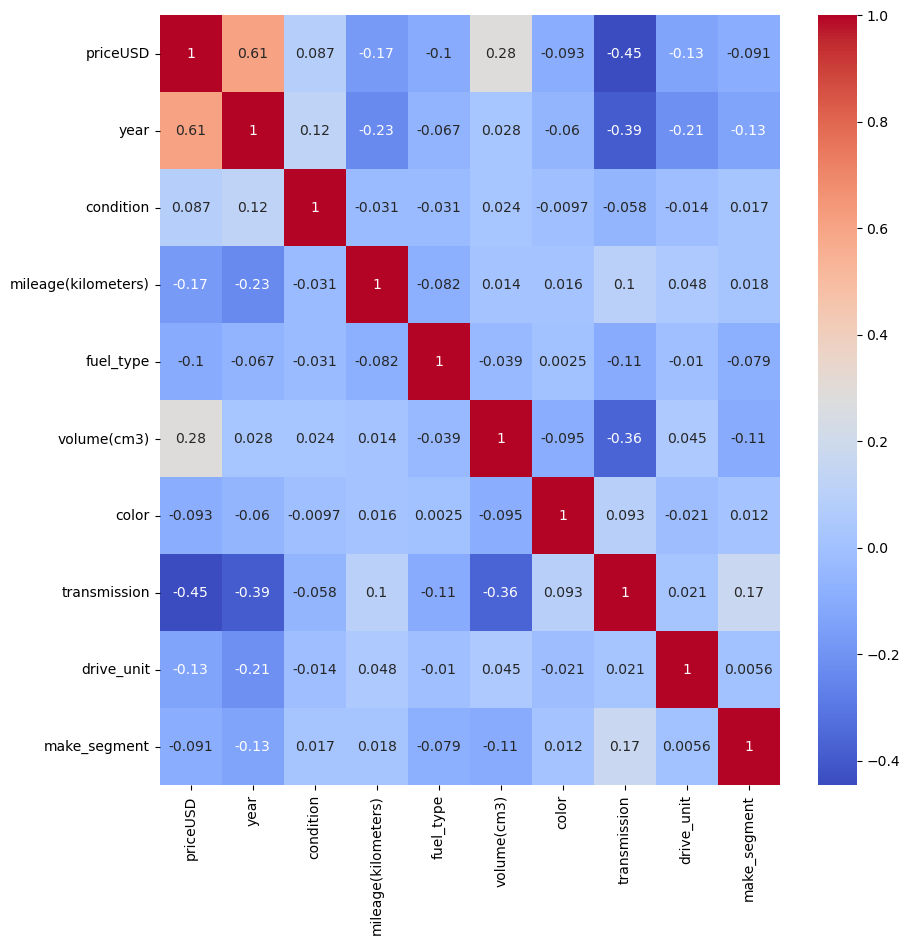

In [23]:
#Correlation Matrix Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

In [24]:
#Outlier Removal
#Using Z - score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df_train))

threshold = 3
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']
df_train = df_train[(z < 3).all(axis=1)]

# Model Training

In [25]:
y_train = df_train['priceUSD']
x_train = df_train.drop(columns=['priceUSD'])

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [27]:
#hyperturning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(x_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 0}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [28]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=8, random_state=0)
#fitting the model
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


0.8715183534307178

# Test preprocessing

In [29]:
#Droping the columns that are not needed for the analysis
df_test.drop(columns = ['model', 'segment'], inplace = True)
df_test.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
19270,mitsubishi,2050,1999,with mileage,250000.0,petrol,1800.0,blue,mechanics,front-wheel drive
25927,ford,4500,2006,with mileage,160000.0,petrol,1400.0,burgundy,mechanics,front-wheel drive
23388,mercedes-benz,3500,1999,with mileage,485000.0,diesel,2900.0,blue,mechanics,rear drive
53189,bmw,21000,2013,with mileage,159000.0,diesel,2000.0,black,auto,NaN
34058,renault,3990,2002,with mileage,331700.0,diesel,1900.0,other,mechanics,front-wheel drive


In [30]:
#Categorizing the car make
def car_make(make):
    if make in  ['mercedes-benz', 'bmw', 'audi', 'porsche', 'jaguar', 'bentley', 'maserati', 'aston-martin', 'mclaren']:
        return 'Luxury European'
    elif make in ['volkswagen', 'renault', 'peugeot', 'opel', 'fiat', 'citroen', 'skoda']:
        return 'Mainstream'
    elif make in  ['ford', 'jeep', 'chevrolet', 'chrysler', 'gmc', 'cadillac', 'buick', 'tesla', 'lincoln', 'pontiac', 'saturn', 'dodge', 'plymouth', 'scion', 'oldsmobile']:
        return 'American'
    elif make in ['nissan', 'subaru', 'mitsubishi', 'honda', 'kia', 'mazda', 'lexus', 'suzuki', 'daewoo', 'hyundai', 'toyota', 'chery', 'lifan', 'ssangyong', 'great-wall', 'geely', 'byd', 'proton', 'isuzu', 'haval', 'dong-feng', 'jac', 'faw', 'zotye', 'hafei', 'saipa', 'roewe', 'tata']:
        return 'Asian'
    elif make in ['lada-vaz', 'moskvich', 'gaz', 'uaz', 'zaz', 'raf', 'wartburg', 'izh', 'luaz', 'fso', 'trabant']:
        return 'Russian/Eastern Europe'
    else:
        return 'Other/Special'
    
df_test['make_segment'] = df_test['make'].apply(car_make)
df_test.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
19270,mitsubishi,2050,1999,with mileage,250000.0,petrol,1800.0,blue,mechanics,front-wheel drive,Asian
25927,ford,4500,2006,with mileage,160000.0,petrol,1400.0,burgundy,mechanics,front-wheel drive,American
23388,mercedes-benz,3500,1999,with mileage,485000.0,diesel,2900.0,blue,mechanics,rear drive,Luxury European
53189,bmw,21000,2013,with mileage,159000.0,diesel,2000.0,black,auto,NaN,Luxury European
34058,renault,3990,2002,with mileage,331700.0,diesel,1900.0,other,mechanics,front-wheel drive,Mainstream


In [31]:
df_test.dropna(inplace=True)

In [32]:
df_test.drop(columns=['make'], inplace=True)

In [33]:
#Label encoding for object data type
from sklearn.preprocessing import LabelEncoder

#columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']
#label encoding object
le = LabelEncoder()

#Label encoding for each column
for col in cols:
    le.fit(df_test[col])
    df_test[col] = le.transform(df_test[col])
    print(col, df_test[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 1  3  7 11 10  0  9  4 12  5  2  8  6]
drive_unit [1 3 0 2]
make_segment [1 0 2 3 5 4]


In [34]:
z = np.abs(stats.zscore(df_test))

threshold = 3
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']
df_test = df_test[(z < 3).all(axis=1)]

In [35]:
x_test = df_test.drop(columns=['priceUSD'])
y_test = df_test['priceUSD']

In [36]:
tree_pred = dtr.predict(x_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, tree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, tree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, tree_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, tree_pred)))

R2 Score:  0.860205131657866
Mean Squared Error:  4265409.926793175
Mean Absolute Error:  1380.1272881920524
Root Mean Squared Error:  2065.2868872854383


# Predicting the price of a new car

In [61]:
new_example = pd.DataFrame({
    "year": [2015],
    "condition": [2],
    "mileage(kilometers)": [50000], 
    "fuel_type": [0],
    "volume(cm3)": [2000], 
    "color": [0],
    "transmission": [1],
    "drive_unit": [3],
    "make_segment": [3]
})
predicted_price = dtr.predict(new_example)
print(f"Predicted price for the new example: ${predicted_price[0]:.2f}")

Predicted price for the new example: $17928.74
